# TOPIXのリターンの分析

株式市場において、TOPIXのリターンにどのような特徴があるか分析を行う

### データ読み込み・加工

In [1]:
#データ読み込み
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm
import seaborn as sns
from scipy.stats import t
from scipy import stats

folder='C:\\Users\\nakam\\python\\stock-analysis\\Data\\'
os.chdir(folder)
file='FTOPIX.xlsx'
df=pd.read_excel(file)
df.head()

,日付,始値,高値,安値,終値,出来高
0,2011-07-22,860,862,857,861,114400
1,2011-07-25,859,859,853,853,45700
2,2011-07-26,856,862,854,858,99000
3,2011-07-27,853,853,847,852,151200
4,2011-07-28,840,844,838,840,199600


In [2]:
del df['出来高']
df.head()

,日付,始値,高値,安値,終値
0,2011-07-22,860,862,857,861
1,2011-07-25,859,859,853,853
2,2011-07-26,856,862,854,858
3,2011-07-27,853,853,847,852
4,2011-07-28,840,844,838,840


In [3]:
#前日の変数を追加
for i in ['始値', '高値', '安値', '終値']:
    df[i+"(前日)"]=df[i].shift(1)
df['前日比率']=df['終値']/df['終値(前日)']
df.head()

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率
0,2011-07-22,860,862,857,861,NaN,NaN,NaN,NaN,NaN
1,2011-07-25,859,859,853,853,860.0,862.0,857.0,861.0,0.990708
2,2011-07-26,856,862,854,858,859.0,859.0,853.0,853.0,1.005862
3,2011-07-27,853,853,847,852,856.0,862.0,854.0,858.0,0.993007
4,2011-07-28,840,844,838,840,853.0,853.0,847.0,852.0,0.985915


### ボラティリティの計算

In [4]:
df['当日の高値-当日の安値']=df['高値']-df['安値']
df['当日の高値-前日の終値']=df['高値']-df['終値(前日)']
df['前日の終値-当日の安値']=df['終値(前日)']-df['安値']
df['True Range']=df[['当日の高値-当日の安値','当日の高値-前日の終値','前日の終値-当日の安値']].max(axis=1)
df.head()

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,当日の高値-当日の安値,当日の高値-前日の終値,前日の終値-当日の安値,True Range
0,2011-07-22,860,862,857,861,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,5.0
1,2011-07-25,859,859,853,853,860.0,862.0,857.0,861.0,0.990708,6,-2.0,8.0,8.0
2,2011-07-26,856,862,854,858,859.0,859.0,853.0,853.0,1.005862,8,9.0,-1.0,9.0
3,2011-07-27,853,853,847,852,856.0,862.0,854.0,858.0,0.993007,6,-5.0,11.0,11.0
4,2011-07-28,840,844,838,840,853.0,853.0,847.0,852.0,0.985915,6,-8.0,14.0,14.0


In [5]:
df['Typical Price']=(df['高値']+df['安値']+df['終値'])/3
df.head()

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,当日の高値-当日の安値,当日の高値-前日の終値,前日の終値-当日の安値,True Range,Typical Price
0,2011-07-22,860,862,857,861,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,5.0,860.000000
1,2011-07-25,859,859,853,853,860.0,862.0,857.0,861.0,0.990708,6,-2.0,8.0,8.0,855.000000
2,2011-07-26,856,862,854,858,859.0,859.0,853.0,853.0,1.005862,8,9.0,-1.0,9.0,858.000000
3,2011-07-27,853,853,847,852,856.0,862.0,854.0,858.0,0.993007,6,-5.0,11.0,11.0,850.666667
4,2011-07-28,840,844,838,840,853.0,853.0,847.0,852.0,0.985915,6,-8.0,14.0,14.0,840.666667


In [6]:
df['ボラティリティ']=df['True Range']/df['Typical Price']
df.head()

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,当日の高値-当日の安値,当日の高値-前日の終値,前日の終値-当日の安値,True Range,Typical Price,ボラティリティ
0,2011-07-22,860,862,857,861,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,5.0,860.000000,0.005814
1,2011-07-25,859,859,853,853,860.0,862.0,857.0,861.0,0.990708,6,-2.0,8.0,8.0,855.000000,0.009357
2,2011-07-26,856,862,854,858,859.0,859.0,853.0,853.0,1.005862,8,9.0,-1.0,9.0,858.000000,0.010490
3,2011-07-27,853,853,847,852,856.0,862.0,854.0,858.0,0.993007,6,-5.0,11.0,11.0,850.666667,0.012931
4,2011-07-28,840,844,838,840,853.0,853.0,847.0,852.0,0.985915,6,-8.0,14.0,14.0,840.666667,0.016653


In [7]:
#欠損処理
df=df.dropna()
df.head()

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,当日の高値-当日の安値,当日の高値-前日の終値,前日の終値-当日の安値,True Range,Typical Price,ボラティリティ
1,2011-07-25,859,859,853,853,860.0,862.0,857.0,861.0,0.990708,6,-2.0,8.0,8.0,855.000000,0.009357
2,2011-07-26,856,862,854,858,859.0,859.0,853.0,853.0,1.005862,8,9.0,-1.0,9.0,858.000000,0.010490
3,2011-07-27,853,853,847,852,856.0,862.0,854.0,858.0,0.993007,6,-5.0,11.0,11.0,850.666667,0.012931
4,2011-07-28,840,844,838,840,853.0,853.0,847.0,852.0,0.985915,6,-8.0,14.0,14.0,840.666667,0.016653
5,2011-07-29,836,840,834,834,840.0,844.0,838.0,840.0,0.992857,6,0.0,6.0,6.0,836.000000,0.007177


### 時系列データの確認

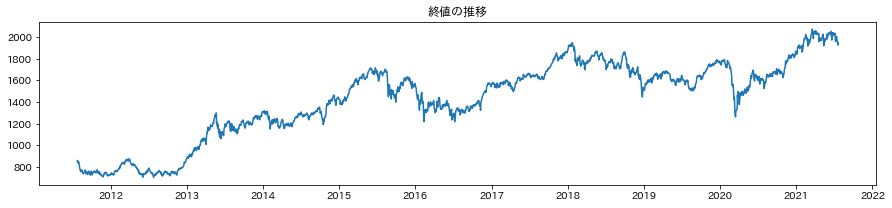

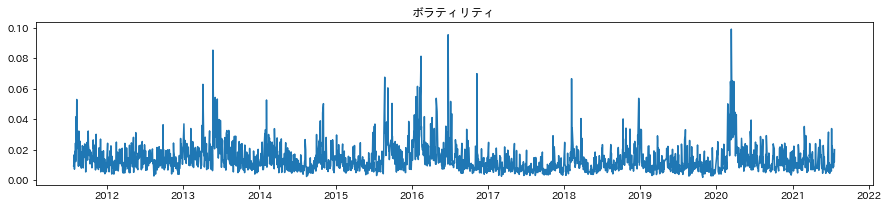

In [8]:
plt.figure(figsize=(15,3))
plt.plot(df['日付'],df['終値'])
plt.title('終値の推移')
plt.show()

plt.figure(figsize=(15,3))
plt.plot(df['日付'],df['ボラティリティ'])
plt.title('ボラティリティ')
plt.show()

### 株のリターンは正規分布するかを検証

平均:1.00040785740211,標準偏差：0.01222221167576438


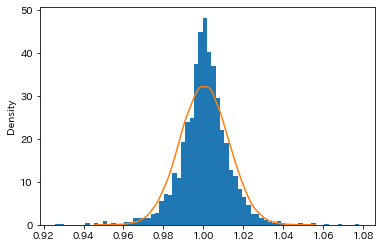

In [9]:
#正規分布を推定
loc, scale = norm.fit(df['前日比率'].dropna())
print('平均:{},標準偏差：{}'.format(loc, scale))

sample = np.random.normal(loc, scale, 100000)


plt.hist(df['前日比率'],bins=70,density=True)
sns.kdeplot(sample)
plt.show()

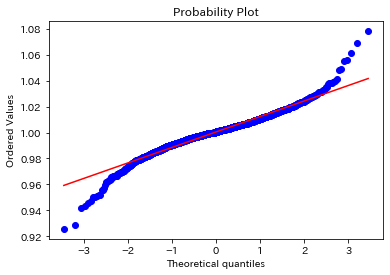

In [10]:
#q-qプロットを確認すると、正規分布していないことがわかる
stats.probplot(df['前日比率'].dropna(), dist="norm",plot=plt)
plt.show()

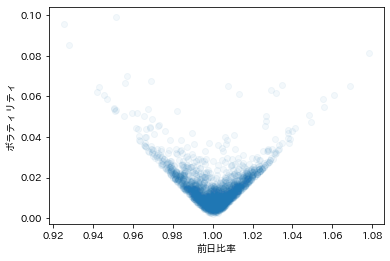

In [11]:
#ボラティリティと前日比率の関係性は以下のようになる

plt.scatter(df['前日比率'],df['ボラティリティ'],alpha=0.05)
plt.xlabel('前日比率')
plt.ylabel('ボラティリティ')
plt.show()

### OneClassSVMを使って、データをクラスタリングする

In [12]:
#正規化を実施
X_train=df[['前日比率','ボラティリティ']]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_std

array([[-0.79358623, -0.4866718 ],
       [ 0.44622098, -0.36673214],
       [-0.60552579, -0.10822285],
       ...,
       [-1.19450098,  0.37191456],
       [-0.83262303, -0.21405138],
       [ 0.73128638,  0.64132786]])

<ipython-input-13-2dbeba5cee37>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['svm']=pred


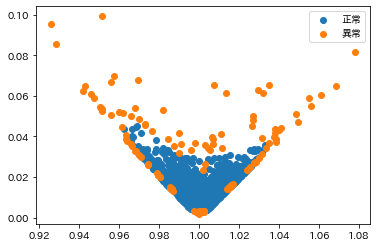

In [13]:
#one class svmでデータを正常・異常に分ける
from sklearn.svm import OneClassSVM
clf = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.5)
clf.fit(X_train_std)
pred = clf.predict(X_train_std)

X_train['svm']=pred

for i in [1,-1]:    
    temp=X_train[X_train['svm']==i]
    plt.scatter(temp['前日比率'],temp['ボラティリティ'])
plt.legend(['正常','異常'])
plt.show()

### 正常データのみでqqプロット

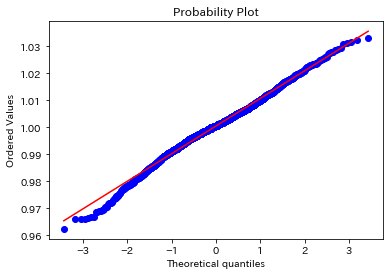

In [14]:
#正規分布していることがわかる
df_temp_1=X_train[X_train['svm']==1]

stats.probplot(df_temp_1['前日比率'].dropna(), dist="norm",plot=plt)
plt.show()

平均:1.0005478168389164,標準偏差：0.01024285501985374


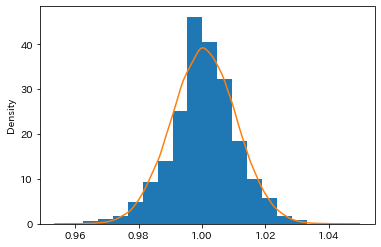

In [15]:
#正規分布を推定
loc1, scale1 = norm.fit(df_temp_1['前日比率'].dropna())
print('平均:{},標準偏差：{}'.format(loc1, scale1))

sample_1 = np.random.normal(loc1, scale1, 100000)

plt.hist(df_temp_1['前日比率'],bins=15,density=True)
sns.kdeplot(sample_1)
plt.show()

### 異常データでqqプロット

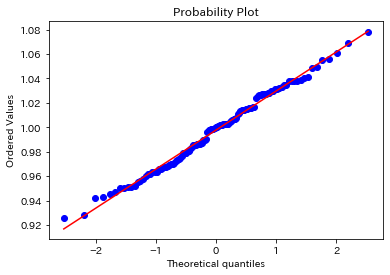

In [16]:
df_temp_2=X_train[X_train['svm']==-1]

stats.probplot(df_temp_2['前日比率'].dropna(), dist="norm",plot=plt)
plt.show()

平均:0.9977185541742207,標準偏差：0.03156247263311538


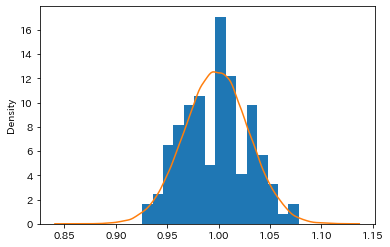

In [17]:
#正規分布を推定
loc2, scale2 = norm.fit(df_temp_2['前日比率'].dropna())
print('平均:{},標準偏差：{}'.format(loc2, scale2))

sample_2 = np.random.normal(loc2, scale2, 100000)

plt.hist(df_temp_2['前日比率'],bins=15,density=True)
sns.kdeplot(sample_2)
plt.show()

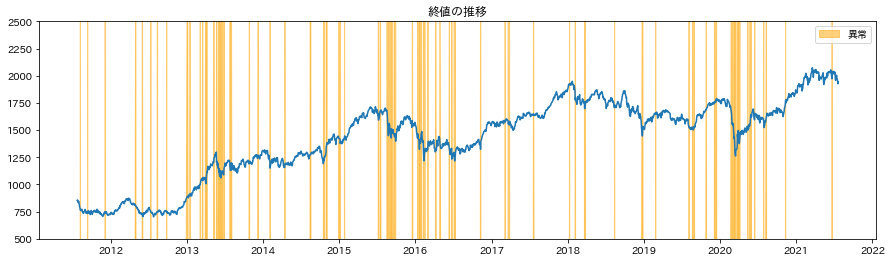

In [18]:
#異常と正常の分布は以下
plt.figure(figsize=(15,4))
plt.plot(df['日付'],df['終値'])
plt.title('終値の推移')
plt.fill_between(df['日付'],-100,(-X_train['svm']+1)*2000, color="orange", alpha=0.5, label='異常')
plt.ylim(500,2500)
plt.legend()

### 正常時のリターンを95%区間推定

In [19]:
#母分散
sigma2 = scale1**2

#標本サイズ
n = len(df_temp_1)

#標本平均
sample_mean = loc1
 
#標準正規分布の上側2.5%点
p_975 = t.ppf(0.975, len(df_temp_1)-1)
 
#信頼区間
x_0 = sample_mean - (p_975 * (np.sqrt(sigma2 / n)))
x_1 = sample_mean + (p_975 * (np.sqrt(sigma2 / n)))
print('下限:{},上限:{}'.format(x_0, x_1))

下限:1.0001312507811582,上限:1.0009643828966746


### 異常時のリターンを95%区間推定

In [20]:
sigma2 = scale2**2
n = len(df_temp_2)
sample_mean = loc2
z_a = stats.norm.ppf(scale=1, loc=0, q=0.975)
x_0 = sample_mean - (z_a * (np.sqrt(sigma2 / n)))
x_1 = sample_mean + (z_a * (np.sqrt(sigma2 / n)))
print('下限:{},上限:{}'.format(x_0, x_1))

下限:0.9920947987538627,上限:1.0033423095945786


### シミュレーションのための関数を作成

In [21]:
#関数を定義
def make_return():
    if np.random.rand()<0.05:
        a=np.random.normal(loc2,scale2)
        svm_result=-1
    else:
        a=np.random.normal(loc1,scale1)
        svm_result=1
    return a,svm_result

In [22]:
#シミュレーションの動作確認
return_list=[]
svm_list=[]
for i in range(10000):
    a,svm_result=make_return()
    return_list.append(a)
    svm_list.append(svm_result)
    
return_list=np.array(return_list)
df_sim=pd.DataFrame({'return':return_list,'svm':svm_list})

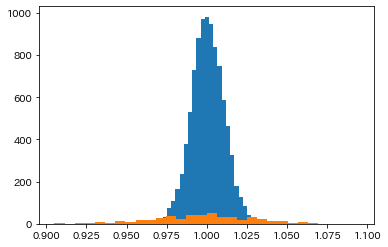

In [23]:
#シミュレーションの結果確認
plt.hist(df_sim[df_sim['svm']==1]['return'],bins=30)
plt.hist(df_sim[df_sim['svm']==-1]['return'],bins=30)
plt.show()

### シミュレーションを1000回実行

In [24]:
df_sim1=pd.DataFrame()

from tqdm import tqdm
for j in tqdm(range(1000)):
    return_list=[]
    for i in range(240*10*2):
        a,svm_result=make_return()
        return_list.append(a)
    return_list=np.array(return_list)
    df_sim1[j]=return_list

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.73it/s]


In [25]:
#リターンを計算
df_sim2=df_sim1.cumprod()

損失回数：331/1000
95%点:1.500倍
中央値:1.082倍
5%点:0.782倍


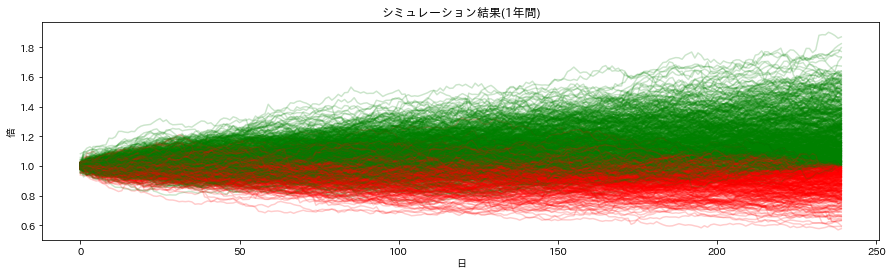

損失回数：181/1000
95%点:3.097倍
中央値:1.517倍
5%点:0.718倍


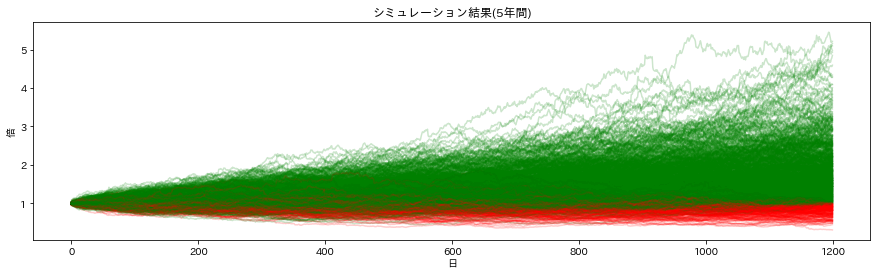

損失回数：113/1000
95%点:5.535倍
中央値:2.216倍
5%点:0.751倍


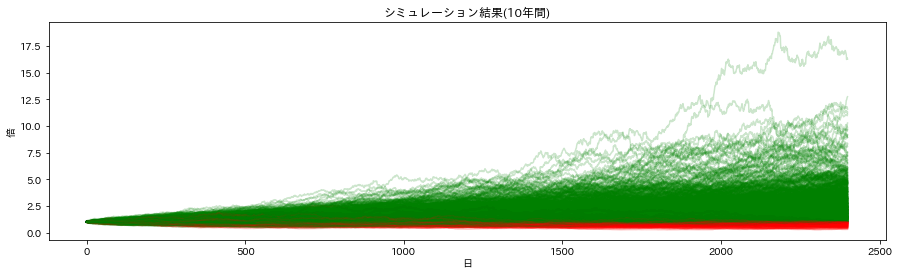

損失回数：25/1000
95%点:19.879倍
中央値:4.988倍
5%点:1.303倍


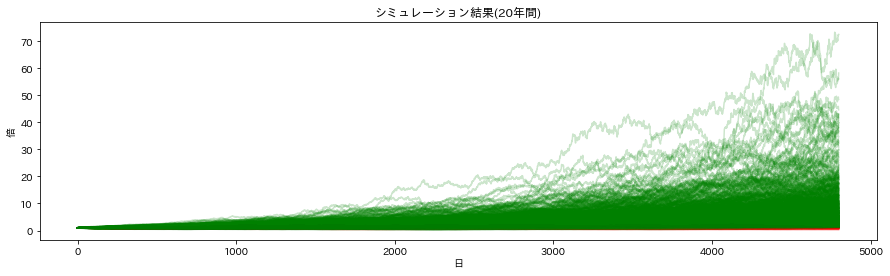

In [26]:
#結果を可視化
plt.figure(figsize=(15,4))
num=0
for i in df_sim2.columns:
    temp=df_sim2[i].iloc[:240*1]
    if temp.iloc[-1]<1:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
print("損失回数：{}/1000".format(num)) 
print("95%点:{:.3f}倍".format(df_sim2.iloc[240*1-1].quantile(0.95)))
print("中央値:{:.3f}倍".format(df_sim2.iloc[240*1-1].median()))
print("5%点:{:.3f}倍".format(df_sim2.iloc[240*1-1].quantile(0.05)))
plt.title('シミュレーション結果(1年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()
        
plt.figure(figsize=(15,4))
num=0
for i in df_sim2.columns:
    temp=df_sim2[i].iloc[:240*5]
    if temp.iloc[-1]<1:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
print("損失回数：{}/1000".format(num)) 
print("95%点:{:.3f}倍".format(df_sim2.iloc[240*5-1].quantile(0.95)))
print("中央値:{:.3f}倍".format(df_sim2.iloc[240*5-1].median()))
print("5%点:{:.3f}倍".format(df_sim2.iloc[240*5-1].quantile(0.05)))
plt.title('シミュレーション結果(5年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()
        
plt.figure(figsize=(15,4))
num=0
for i in df_sim2.columns:
    temp=df_sim2[i].iloc[:240*10]
    if temp.iloc[-1]<1:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
print("損失回数：{}/1000".format(num)) 
print("95%点:{:.3f}倍".format(df_sim2.iloc[240*10-1].quantile(0.95)))
print("中央値:{:.3f}倍".format(df_sim2.iloc[240*10-1].median()))
print("5%点:{:.3f}倍".format(df_sim2.iloc[240*10-1].quantile(0.05)))
plt.title('シミュレーション結果(10年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()
        
plt.figure(figsize=(15,4))
num=0
for i in df_sim2.columns:
    temp=df_sim2[i].iloc[:240*20]
    if temp.iloc[-1]<1:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
print("損失回数：{}/1000".format(num))
print("95%点:{:.3f}倍".format(df_sim2.iloc[240*20-1].quantile(0.95)))
print("中央値:{:.3f}倍".format(df_sim2.iloc[240*20-1].median()))
print("5%点:{:.3f}倍".format(df_sim2.iloc[240*20-1].quantile(0.05)))
plt.title('シミュレーション結果(20年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()